# Libraries

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Data preparation

In [8]:
#Reading the data from the csv file
data = pd.read_csv("weatherHistory.csv")

#Handling missing data
data.fillna(method='ffill', inplace=True)

#Handling duplicates
data.drop_duplicates(inplace=True)

#numerical features for prediction
features = data[['Temperature (C)', 'Apparent Temperature (C)', 
                'Humidity', 'Wind Speed (km/h)', 
                'Wind Bearing (degrees)', 
                'Visibility (km)', 'Pressure (millibars)']]

target = data['Summary']

C:\Users\Fares\AppData\Local\Temp\ipykernel_12532\2075833393.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


# Data processing (Encode categorical varaibles)

In [9]:
label_encoder = LabelEncoder()
target = label_encoder.fit_transform(target)

# Split the data

In [34]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=0)

models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    #'Support Vector Machine': SVC(kernel=linear_model)
}

# Model Train and Evaulation

In [36]:
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    print(f"{name} trained.")
    y_pred = model.predict(X_test)
    print(f"Predictions made for {name}.")
    print(f"Model: {name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("\n")

Training Decision Tree...
Decision Tree trained.
Predictions made for Decision Tree.
Model: Decision Tree
Accuracy: 0.4925334439489785


Training Random Forest...
Random Forest trained.
Predictions made for Random Forest.
Model: Random Forest
Accuracy: 0.5906356942860106




# Plotting of true VS predicted

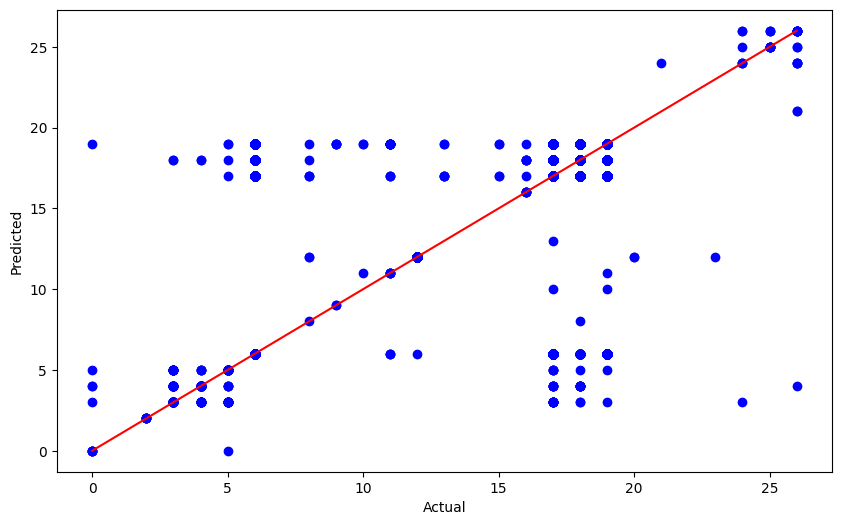

In [37]:
rf_model = models['Random Forest']
y_pred_rf = rf_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)],[min(y_test), max(y_test)], color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()
    